# Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import train_test_split

# Dataset

In [2]:
df = pd.read_csv("../Models/data_tofit.csv")
df

,Age,Gender,Education,Nscore,Escore,Oscore,Ascore,Cscore,SS,Amphet,Amyl,Benzos,Cannabis,Heroin,Ketamine,LSD,Meth,VSA,Addiction
0,0.49788,0.48246,-0.05921,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-1.18084,1,0,1,0,0,0,0,0,0,No Addiction
1,-0.07854,-0.48246,1.98437,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.21575,1,1,0,1,0,1,1,1,0,Addiction without psychologic effect
2,0.49788,-0.48246,-0.05921,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,0.40148,0,0,0,1,0,0,0,0,0,No Addiction
3,-0.95197,0.48246,1.16365,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.18084,0,0,1,1,0,1,0,0,0,No Addiction
4,0.49788,0.48246,1.98437,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21575,0,0,0,1,0,0,0,0,0,No Addiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,-0.95197,0.48246,-0.61113,-1.19430,1.74091,1.88511,0.76096,-1.13788,1.92173,0,0,0,1,0,0,1,0,1,Addiction without psychologic effect
1881,-0.95197,-0.48246,-0.61113,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.76540,0,0,0,1,0,0,1,1,0,Addiction without psychologic effect
1882,-0.07854,0.48246,0.45468,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,-0.52593,1,1,1,1,0,1,1,0,0,Addiction with psychologic effect
1883,-0.95197,0.48246,-0.61113,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.22470,0,0,0,1,0,0,1,0,0,Addiction with psychologic effect


# Test/train

In [3]:
# Split train test
X_train, X_test, y_train, y_test = train_test_split(df.drop("Addiction", axis = 1), df["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df["Addiction"])

# Random Forest Model

In [6]:
param = {"max_depth": [2,6,8] ,\
        "min_samples_leaf": [5,10,15],\
        "n_estimators": [500,800,1500],\
        "max_features":["auto", "sqrt","log2"]}

In [7]:
rf_grid = GridSearchCV(RandomForestClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
rf_grid.fit(X_train, y_train)
rf_grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [500, 800, 1500]},
             scoring='accuracy')

In [8]:
print("Best parameters {} with best score {} ".format(rf_grid.best_params_,\
rf_grid.best_score_))

Best parameters {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 1500} with best score 0.9012244897959183 


## Testing model

In [9]:
# Testing model
y_pred = rf_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8909090909090909

In [10]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,161,12,10,183
Addiction without psychologic effect,16,152,11,179
No Addiction,14,9,275,298
All,191,173,296,660


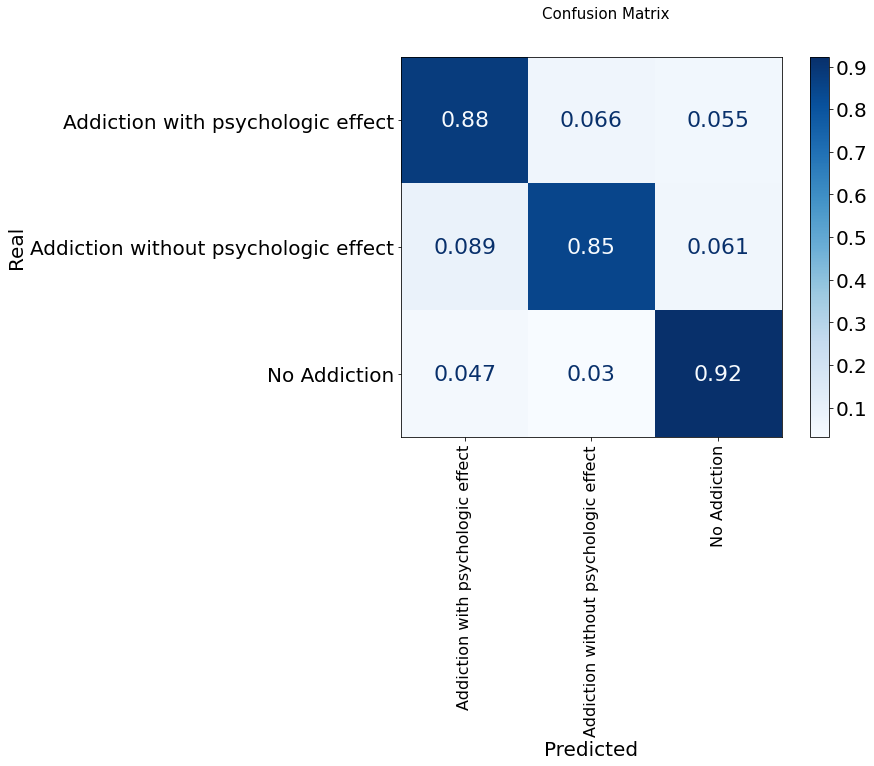

In [11]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(rf_grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.show() 

In [12]:
# Importance Featuring

importance = pd.DataFrame(data=rf_grid.best_estimator_.feature_importances_, columns = ['Value'],\
index=X_test.columns).reset_index().rename(columns={'index':'Variable'}).sort_values('Value').reset_index(drop=True)
importance['%'] = importance['Value']*100
importance

,Variable,Value,%
0,Heroin,0.002304,0.230399
1,Amyl,0.003839,0.383865
2,VSA,0.003964,0.396412
3,Ketamine,0.008350,0.835040
4,Meth,0.008559,0.855911
5,Gender,0.009215,0.921488
6,Benzos,0.016416,1.641580
7,Ascore,0.027105,2.710499
8,Education,0.028873,2.887284
9,Age,0.038309,3.830921


<BarContainer object of 18 artists>

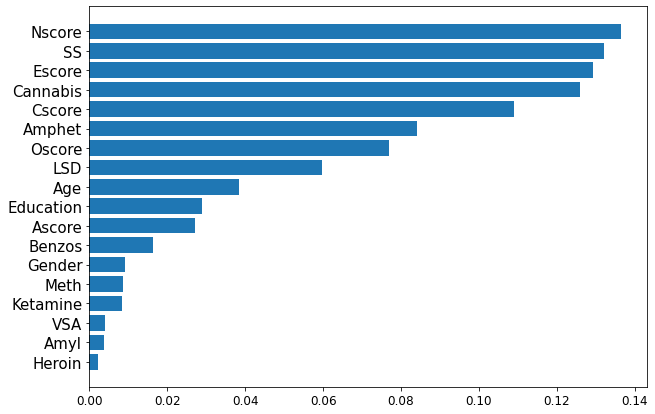

In [13]:
# Model importance
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
plt.barh(importance['Variable'], importance['Value'])

We can Remove Amyl, Benzos, Heroin

## Removing features

In [14]:
# Split train test
df_important = df.drop(["Amyl", "VSA","Heroin"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(df_important.drop("Addiction", axis = 1), df_important["Addiction"], test_size=0.35, random_state = 42,\
                                                   stratify = df_important["Addiction"])

In [15]:
rf_grid = GridSearchCV(RandomForestClassifier(), param, cv= KFold(n_splits=5, random_state=42, shuffle = True),scoring = "accuracy")
rf_grid.fit(X_train, y_train)
rf_grid

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 6, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 15],
                         'n_estimators': [500, 800, 1500]},
             scoring='accuracy')

In [17]:
print("Best parameters {} with best score {} ".format(rf_grid.best_params_,\
rf_grid.best_score_))

Best parameters {'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 5, 'n_estimators': 800} with best score 0.8979591836734693 


In [19]:
# get the grid search results
results = pd.DataFrame(rf_grid.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.610938,0.005155,0.046609,0.002497,2,auto,5,500,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.861224,0.865306,0.828571,0.783673,0.816327,0.831020,0.030171,63
1,0.969017,0.013440,0.070416,0.002245,2,auto,5,800,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.869388,0.869388,0.808163,0.775510,0.816327,0.827755,0.036635,73
2,1.854215,0.039406,0.139631,0.003499,2,auto,5,1500,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.869388,0.865306,0.812245,0.783673,0.804082,0.826939,0.034305,74
3,0.620139,0.003034,0.047411,0.001855,2,auto,10,500,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.869388,0.865306,0.804082,0.795918,0.828571,0.832653,0.030325,59
4,0.980220,0.017057,0.073016,0.002530,2,auto,10,800,"{'max_depth': 2, 'max_features': 'auto', 'min_...",0.873469,0.861224,0.816327,0.791837,0.824490,0.833469,0.029927,56


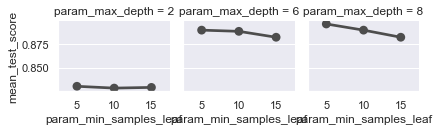

In [28]:
#Comparing scores by max depth and min samples
sns.set()
g = sns.FacetGrid(results, col="param_max_depth", col_wrap=3, height=2)
g.map(sns.pointplot, "param_min_samples_leaf", "mean_test_score", order=[5,10,15], color=".3", ci=None)

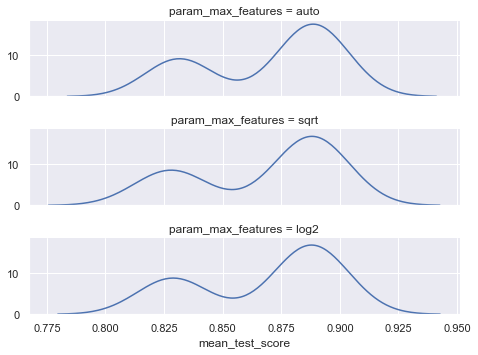

In [29]:
#Looking features scores
g = sns.FacetGrid(results, row="param_max_features",
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "mean_test_score")

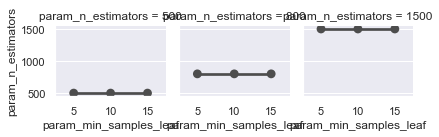

In [30]:
sns.set()
g = sns.FacetGrid(results, col="param_n_estimators", col_wrap=3, height=2)
g.map(sns.pointplot, "param_min_samples_leaf", "param_n_estimators", order=[5,10,15], color=".3", ci=None)

- n_estimator don't seem to have an impace
- learning rate get a maximum between 0.1 and 1 

## Testing model

In [18]:
# Testing model
y_pred = rf_grid.predict(X_test)
accuracy_score(y_test, y_pred)

0.8939393939393939

In [21]:
cross = pd.crosstab(y_test, y_pred, rownames=['Real'], colnames=['Predicted'], margins=True)
cross

Predicted,Addiction with psychologic effect,Addiction without psychologic effect,No Addiction,All
Real,,,,
Addiction with psychologic effect,164,8,11,183
Addiction without psychologic effect,15,152,12,179
No Addiction,15,9,274,298
All,194,169,297,660


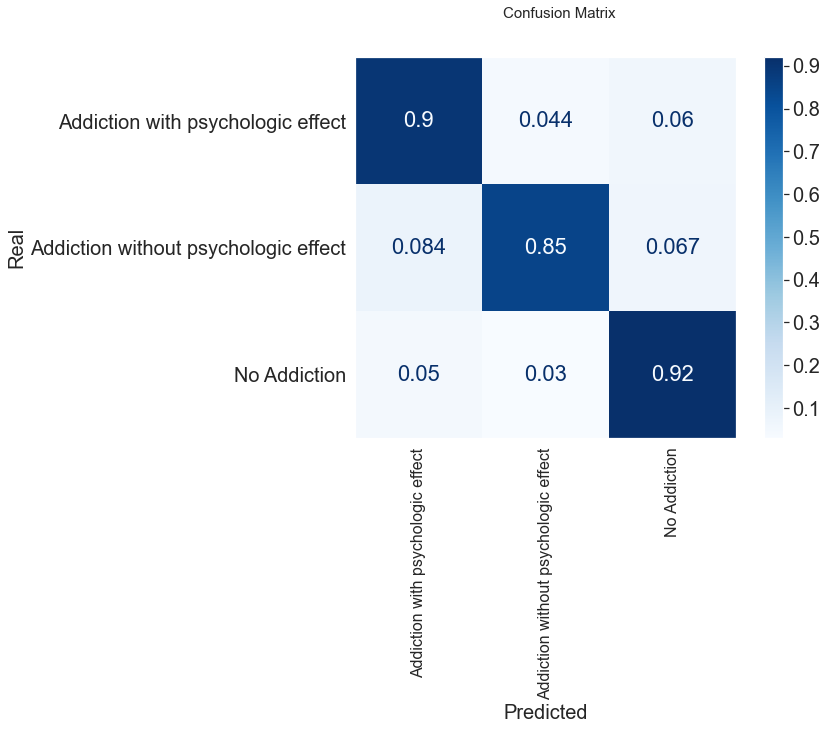

In [24]:
# Confusion Matrix

plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(1, 1, figsize=(10,7))
plt.grid(False)
fig.suptitle('Confusion Matrix', fontsize=15)
plot_confusion_matrix(rf_grid, X_test, y_test, normalize='true', cmap=plt.cm.Blues, ax=ax)
plt.xlabel('Predicted')
plt.xticks(rotation =90)
plt.ylabel('Real')
plt.show() 

In [25]:
# Importance Featuring

importance = pd.DataFrame(data=rf_grid.best_estimator_.feature_importances_, columns = ['Value'],\
index=X_test.columns).reset_index().rename(columns={'index':'Variable'}).sort_values('Value').reset_index(drop=True)
importance['%'] = importance['Value']*100
importance

,Variable,Value,%
0,Ketamine,0.009280,0.927970
1,Meth,0.009436,0.943608
2,Gender,0.010161,1.016126
3,Benzos,0.019973,1.997280
4,Ascore,0.027540,2.754001
5,Education,0.032676,3.267630
6,Age,0.039960,3.995973
7,LSD,0.066670,6.666981
8,Oscore,0.078900,7.890016
9,Amphet,0.082664,8.266409


<BarContainer object of 15 artists>

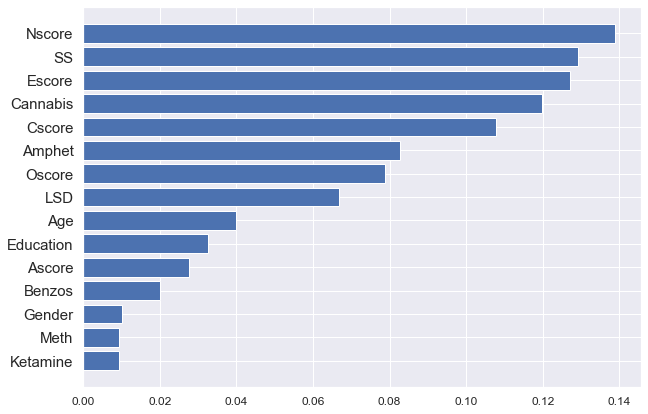

In [26]:
# Model importance
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(10,7))
plt.barh(importance['Variable'], importance['Value'])

Removing features don't seem useful we can stop here